# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import math
from datetime import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Free users can make up to 60 API calls per minute.
limit = 60
groups = math.ceil(len(cities)/limit)
print("call groups:",groups)

# Split up the cities.
city_sets = np.array_split(cities, groups)
len(city_sets)
len(city_sets[0])

# run API calls
url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid": weather_api_key,
    "units": "Imperial"
}

response_list = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# iterate through list of cities, only append city data if found.
for set_index, city_set in enumerate(city_sets):
    for city_index, city_set in enumerate(city_sets[set_index]):
        print(f"Processing Record {city_index} of Set {set_index} | {city_sets[set_index][city_index]}")
        params['q'] = city_sets[set_index][city_index]    
        
        response = requests.get(url, params=params)
        
        response_json = response.json()
        
        # Check that city has entry on OpenWeatherMap.
        if response_json['cod'] == 200:
            response_list.append(response_json)
        else:
            if response_json['cod'] == 404:
                print("City not found. Skipping...")
#     break
    time.sleep(10)
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

call groups: 10
Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 0 | lenki
Processing Record 1 of Set 0 | punta arenas
Processing Record 2 of Set 0 | tuatapere
Processing Record 3 of Set 0 | padang
Processing Record 4 of Set 0 | rikitea
Processing Record 5 of Set 0 | taolanaro
Processing Record 6 of Set 0 | jamestown
Processing Record 7 of Set 0 | tuktoyaktuk
Processing Record 8 of Set 0 | port alfred
Processing Record 9 of Set 0 | puerto ayora
Processing Record 10 of Set 0 | avarua
Processing Record 11 of Set 0 | itarema
Processing Record 12 of Set 0 | ushuaia
Processing Record 13 of Set 0 | kathu
Processing Record 14 of Set 0 | mataura
Processing Record 15 of Set 0 | saint-francois
Processing Record 16 of Set 0 | vaini
Processing Record 17 of Set 0 | abu dhabi
Processing Record 18 of Set 0 | hermanus
Processing Record 19 of Set 0 | bluff
Processing Record 20 of Set 0 | toppenish
Processing Record 21 of Set 0 | guerrero negro
Processing Record 22 of Se

Processing Record 22 of Set 3 | salalah
Processing Record 23 of Set 3 | savannah bight
Processing Record 24 of Set 3 | clermont
Processing Record 25 of Set 3 | hambantota
Processing Record 26 of Set 3 | malanje
Processing Record 27 of Set 3 | shingu
Processing Record 28 of Set 3 | srandakan
Processing Record 29 of Set 3 | catamarca
Processing Record 30 of Set 3 | kahului
Processing Record 31 of Set 3 | sigayevo
Processing Record 32 of Set 3 | dera din panah
Processing Record 33 of Set 3 | inirida
Processing Record 34 of Set 3 | majene
Processing Record 35 of Set 3 | ponta delgada
Processing Record 36 of Set 3 | kachikau
Processing Record 37 of Set 3 | makanya
Processing Record 38 of Set 3 | airai
Processing Record 39 of Set 3 | waipawa
Processing Record 40 of Set 3 | caravelas
Processing Record 41 of Set 3 | lebu
Processing Record 42 of Set 3 | ganzhou
Processing Record 43 of Set 3 | yar-sale
Processing Record 44 of Set 3 | karakendzha
Processing Record 45 of Set 3 | ulaanbaatar
Proces

Processing Record 48 of Set 6 | mahanoro
Processing Record 49 of Set 6 | pompeu
Processing Record 50 of Set 6 | paita
Processing Record 51 of Set 6 | ust-nera
Processing Record 52 of Set 6 | mezen
Processing Record 53 of Set 6 | flinders
Processing Record 54 of Set 6 | qui nhon
Processing Record 55 of Set 6 | aravete
Processing Record 56 of Set 6 | cooma
Processing Record 57 of Set 6 | saldanha
Processing Record 0 of Set 7 | cockburn town
Processing Record 1 of Set 7 | panama city
Processing Record 2 of Set 7 | ornskoldsvik
Processing Record 3 of Set 7 | athens
Processing Record 4 of Set 7 | ilulissat
Processing Record 5 of Set 7 | abnub
Processing Record 6 of Set 7 | kidal
Processing Record 7 of Set 7 | freeport
Processing Record 8 of Set 7 | wyndham
Processing Record 9 of Set 7 | yoichi
Processing Record 10 of Set 7 | novaya igirma
Processing Record 11 of Set 7 | abalak
Processing Record 12 of Set 7 | seoul
Processing Record 13 of Set 7 | ayr
Processing Record 14 of Set 7 | galiwinku

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#collect relevant data from response JSON objects.
city_names  = [response['name'] for response in response_list]
country     = [response['sys']['country'] for response in response_list]
dates       = [response['dt'] for response in response_list]
lats        = [response['coord']['lat'] for response in response_list]
lngs        = [response['coord']['lon'] for response in response_list]
cloudiness  = [response['clouds']['all'] for response in response_list]
humidity    = [response['main']['humidity'] for response in response_list]
temps       = [response['main']['temp_max'] for response in response_list]
wind        = [response['wind']['speed'] for response in response_list]

# Convert timestamps into datetime format.
dates_converted = [datetime.utcfromtimestamp(int(ts)).strftime('%m/%d/%Y') for ts in dates]
latest_date = max(dates_converted)

obj_data = zip(city_names, country, dates_converted, lats, lngs, temps, cloudiness, humidity, wind)
column_names = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity', 'Wind Speed']
city_df = pd.DataFrame(list(obj_data), columns = column_names )

# export city data to .csv
city_df.to_csv('city_weather.csv', index=False)
city_df.head()

City Country        Date    Lat     Lng  Max Temp  Cloudiness  \
0  Punta Arenas      CL  05/11/2020 -53.15  -70.92     44.60          75   
1     Tuatapere      NZ  05/11/2020 -46.13  167.68     43.05          53   
2        Padang      ID  05/11/2020  -0.95  100.35     79.84         100   
3       Rikitea      PF  05/11/2020 -23.12 -134.97     74.57          99   
4     Jamestown      US  05/11/2020  42.10  -79.24     36.00          90   

   Humidity  Wind Speed  
0        81       19.46  
1        86        5.08  
2        78        3.85  
3        72        9.86  
4        93       13.87

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

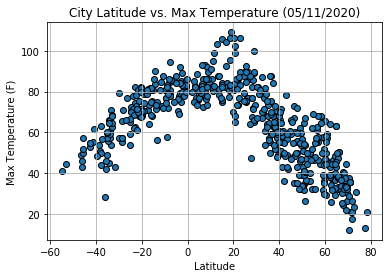

In [46]:
plt.scatter(city_df['Lat'], city_df['Max Temp'], marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature ({latest_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('latitude_vs_temp.png')
plt.show()

* The temperature is higher in cities closer to the equator.
* The temperature is lower in cities closer to north and south poles.

#### Latitude vs. Humidity Plot

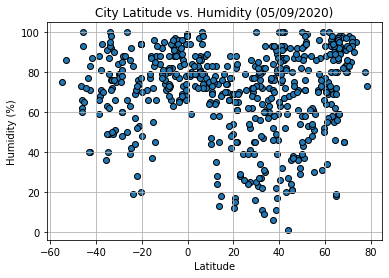

In [29]:
plt.scatter(city_df['Lat'], city_df['Humidity'], marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({latest_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('lat_vs_humidity.png')
plt.show()

* Humidity levels seem to be independant of latitude values.
* Other factors may have a more direct impact on humidity levels in cities of varying latitudes.

#### Latitude vs. Cloudiness Plot

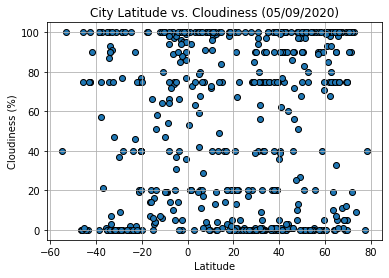

In [30]:
plt.scatter(city_df['Lat'], city_df['Cloudiness'], marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({latest_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('lat_vs_cloudiness.png')
plt.show()

* Cloudiness levels seem to be independant of latitude values.
* Other factors may have a more direct impact on Cloudiness levels in cities of varying latitudes.

#### Latitude vs. Wind Speed Plot

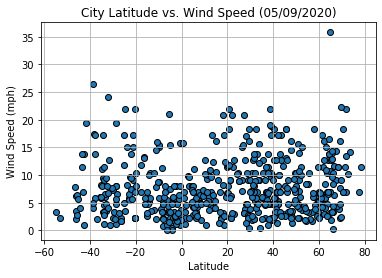

In [31]:
plt.scatter(city_df['Lat'], city_df['Wind Speed'], marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({latest_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('lat_vs_windspeed.png')
plt.show()



* Wind Speed levels seem to be independant of latitude values.
* Other factors may have a more direct impact on Wind Speed levels in cities of varying latitudes.

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
cities_north_df=city_df.loc[city_df["Lat"] > 0]
cities_south_df=city_df.loc[city_df["Lat"] < 0]
cities_north_df.head()

City Country        Date    Lat     Lng  Max Temp  Cloudiness  \
4        Jamestown      US  05/11/2020  42.10  -79.24      36.0          90   
5      Tuktoyaktuk      CA  05/11/2020  69.45 -133.04      26.6          90   
11           Kathu      TH  05/11/2020   7.92   98.33      77.0          75   
13  Saint-François      FR  05/11/2020  46.42    3.91      48.2          90   
15       Abu Dhabi      AE  05/11/2020  24.47   54.37      89.6           0   

    Humidity  Wind Speed  
4         93       13.87  
5         92       11.41  
11        94        2.24  
13        76       10.29  
15        46       17.22

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [51]:
cities_lats = cities_north_df["Lat"]
cities_vals = cities_north_df["Max Temp"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_north_df.plot(kind="scatter", x="Lat", y="Max Temp",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Maximum Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_equation,(0,50),fontsize=14,color="tab:red")

plt.savefig("northlatsvstemperature.png") 
plt.show()

The r-squared is: -0.85


* There is a strong correlation between temperatures and northern latitudes.
* The temperatures tend to decreases with increasing northern latitudes.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.82


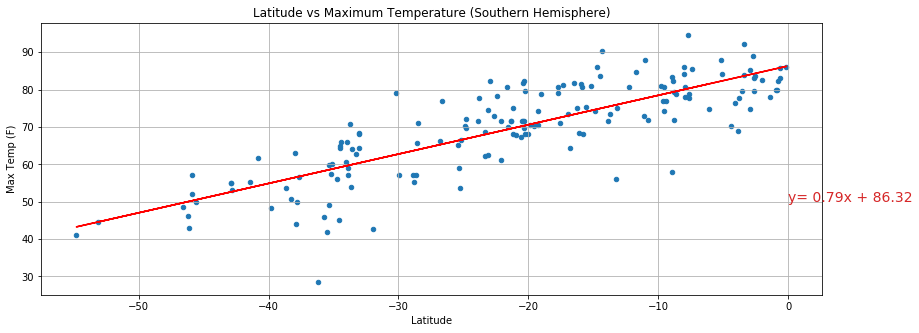

In [52]:
cities_lats = cities_south_df["Lat"]
cities_vals = cities_south_df["Max Temp"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_south_df.plot(kind="scatter", x="Lat", y="Max Temp",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Maximum Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_equation,(0,50),fontsize=14,color="tab:red")

plt.savefig("southlatsvstemperature.png") 
plt.show()

* There is a strong correlation between temperatures and southern latitudes.
* The temperatures tend to decrease with decreasing southern latitudes.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [53]:
cities_lats = cities_north_df["Lat"]
cities_vals = cities_north_df["Humidity"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_north_df.plot(kind="scatter", x="Lat", y="Humidity",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_equation,(0,50),fontsize=14,color="tab:red")

plt.savefig("northlatsvshumidity.png") 
plt.show()

The r-squared is: 0.2


* Cities tend to have slightly higher humidity percentages with increasing latitudes. However, there is a weak correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [54]:
cities_lats = cities_south_df["Lat"]
cities_vals = cities_south_df["Humidity"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_south_df.plot(kind="scatter", x="Lat", y="Humidity",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_equation,(0,50),fontsize=14,color="tab:red")

plt.savefig("southlatsvshumidity.png") 
plt.show()

The r-squared is: 0.08


* Cities tend to have slightly higher humidity percentages with increasing latitudes. However, there is a weak correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [55]:
cities_lats = cities_north_df["Lat"]
cities_vals = cities_north_df["Cloudiness"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_north_df.plot(kind="scatter", x="Lat", y="Cloudiness",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_equation,(0,50),fontsize=14,color="tab:red")

plt.savefig("northlatsvscloudiness.png") 
plt.show()

The r-squared is: 0.17


* Cities tend to have slightly higher cloudiness percentages with increasing latitudes. However, there is a weak correlation between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [62]:
cities_lats = cities_south_df["Lat"]
cities_vals = cities_south_df["Cloudiness"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_south_df.plot(kind="scatter", x="Lat", y="Cloudiness",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("southlatsvscloudiness.png") 
plt.show()

The r-squared is: 0.04


* Cities tend to have slightly higher cloudiness percentages with increasing latitudes. However, there is a very weak correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2


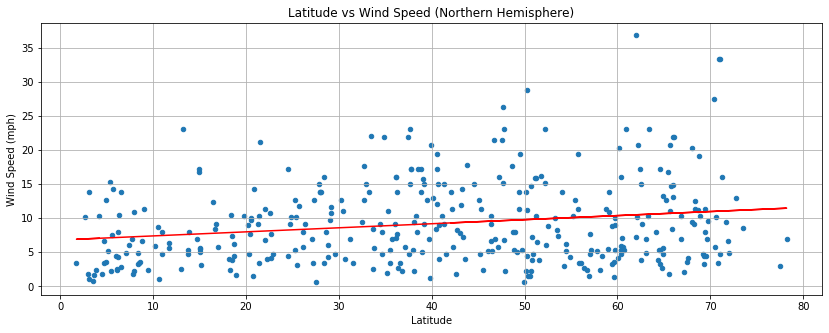

In [61]:
cities_lats = cities_north_df["Lat"]
cities_vals = cities_north_df["Wind Speed"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_north_df.plot(kind="scatter", x="Lat", y="Wind Speed",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("northlatsvswindspeed.png") 
plt.show()

* Cities tend to have slightly higher wind speeds with increasing latitudes. However, there is a very weak correlation between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.13


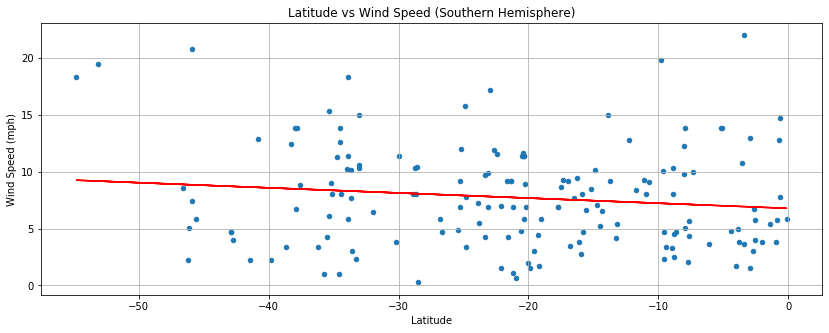

In [60]:
cities_lats = cities_south_df["Lat"]
cities_vals = cities_south_df["Wind Speed"]

#calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_lats, cities_vals)
regress_vals = cities_lats * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {round(rvalue,2)}")

#plot data
cities_south_df.plot(kind="scatter", x="Lat", y="Wind Speed",marker="o",color="tab:blue",grid=True,figsize=(14,5))
plt.plot(cities_lats,regress_vals,"r-")
plt.title(f"Latitude vs Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("southlatsvswindspeed.png") 
plt.show()

* Cities tend to have slightly lower wind speeds with increasing latitudes. However, there is a very weak correlation between latitude and wind speeds.